In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas   as pd


In [2]:
from tensorflow import keras
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train.shape

(60000, 28, 28)

In [4]:
x_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [5]:
#we will only train on zeros
only_zeros= x_train[y_train==0]
only_zeros.shape

(5923, 28, 28)

In [6]:
#as it is a GAN, we need to create generator and discriminator models
from keras.models import Sequential
from keras.layers import Dense,Flatten, Reshape


In [7]:
discriminator = Sequential()
discriminator.add(Flatten())
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [8]:
coding_size = 100
generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[coding_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28,28]))

In [9]:
GAN = Sequential([generator,discriminator])
discriminator.trainable= False
GAN.compile(loss='binary_crossentropy', optimizer='adam')


In [10]:
GAN.layers

In [11]:
#now we'll set the training batches using dataset object from tf
import tensorflow as tf

batch_size = 32
my_data = only_zeros

In [12]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [13]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [14]:
dataset = dataset.batch(batch_size=batch_size, drop_remainder=True).prefetch(1)

In [15]:
epochs= 1

In [16]:
generator, discriminator = GAN.layers

In [17]:
generator

In [18]:
for epoch in range(epochs):
    for x_batch in dataset:
        #training the discriminator
        noise = tf.random.normal(shape=[batch_size, coding_size])
        gen_images = generator(noise)
        fake_vs_real= tf.concat([gen_images, tf.dtypes.cast(x_batch, tf.float32)], axis=0)
        y1= tf.constant([[0.]]*batch_size+[[1.]]*batch_size)
        discriminator.trainable= True
        discriminator.train_on_batch(fake_vs_real,y1)

        #training the generator
        noise = tf.random.normal(shape=[batch_size, coding_size])
        y2= tf.constant([[1.]]*batch_size)
        discriminator.trainable= False
        GAN.train_on_batch(noise,y2)
        


In [19]:
noise = tf.random.normal(shape=[batch_size, coding_size])

In [20]:
image= generator(noise)

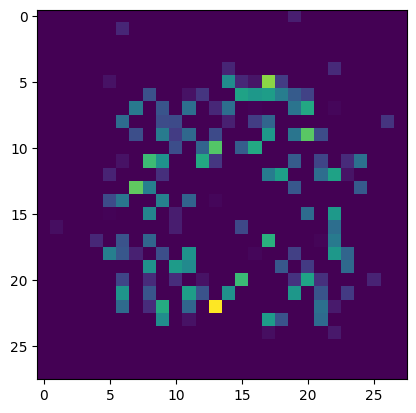

In [23]:
plt.imshow(image[2])

In [24]:
#we can see that mode collapse has occurred 